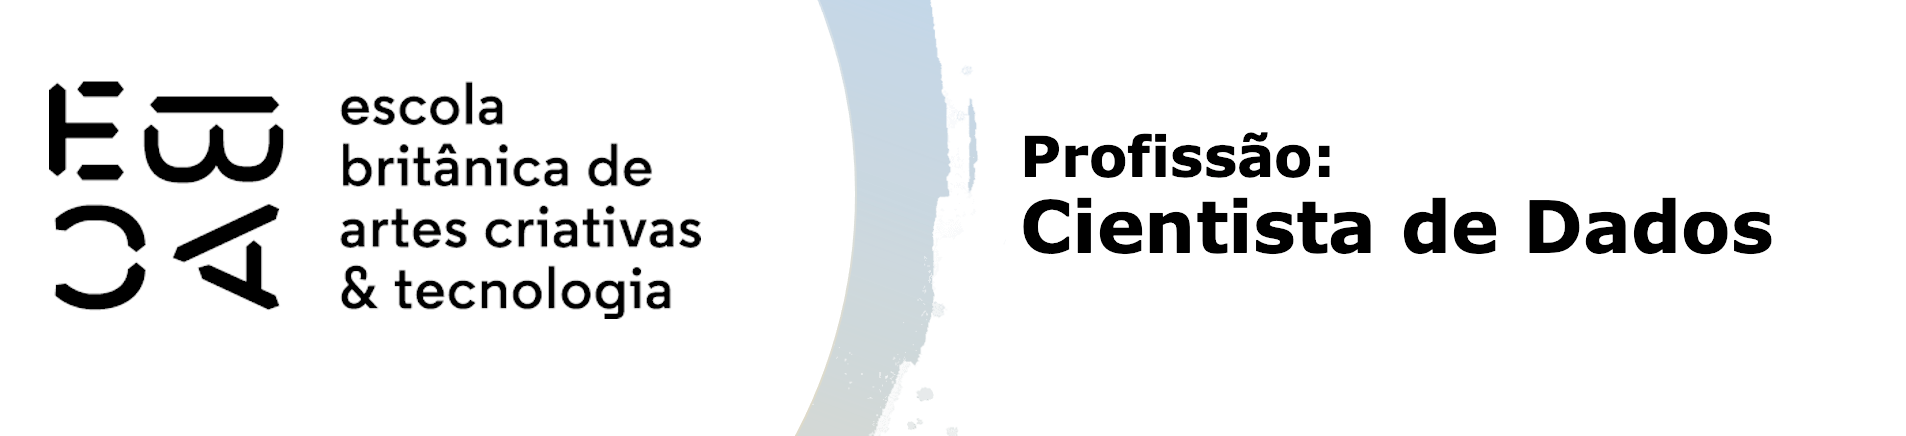

# Métodos hierárquicos de agrupamento - Tarefa

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [18]:
df = sns.load_dataset('penguins')
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [20]:
#Excluidno valores ausentes
df.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [21]:
# Selecionando apenas as variáveis quantitativas e eliminando valores faltantes
quantitative_vars = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].dropna()

# Verificando o número de linhas após a remoção de valores faltantes
print(f"Número de linhas após remoção de valores faltantes: {quantitative_vars.shape[0]}")

Número de linhas após remoção de valores faltantes: 342


In [22]:

quantitative_vars.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [23]:
# Verificando o número de linhas após a remoção de valores faltantes
print(f"Número de linhas após remoção de valores faltantes: {quantitative_vars.shape[0]}")

Número de linhas após remoção de valores faltantes: 342


In [24]:
# Padronizar valores
scaler = StandardScaler()

quantitative_vars_scaled = scaler.fit_transform(quantitative_vars)

quantitative_vars_scaled


array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.18828874, -0.73592307,  1.50164406,  1.93341896],
       [ 0.23443963, -1.19233476,  0.7894512 ,  1.24658968],
       [ 1.09657248, -0.53307343,  0.86067049,  1.49634578]])

In [25]:
# Realizando o agrupamento hierárquico com 3 grupos
clustering = AgglomerativeClustering(n_clusters=3)
clusters = clustering.fit_predict(quantitative_vars_scaled)

# Visualizando os clusters atribuídos
print(clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 0 2 2 2 2 0 2 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [26]:
# Criando uma cópia do DataFrame original com os dados quantitativos sem valores faltantes
df_clean = df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']).copy()

# Adicionando a coluna de clusters ao DataFrame
df_clean['cluster'] = clusters

# Exibindo as primeiras linhas do DataFrame com os clusters
print(df_clean.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  cluster  
0       3750.0    Male        0  
1       3800.0  Female        0  
2       3250.0  Female        0  
4       3450.0  Female        0  
5       3650.0    Male        0  


**Obs:** Por que usar o DataFrame original após o agrupamento?

Depois que o agrupamento é feito usando os dados escalonados, normalmente voltamos ao DataFrame original (ou ao menos às variáveis não escalonadas) para adicionar os resultados dos clusters e interpretar os resultados. Isso ocorre porque:

Interpretação: É mais intuitivo interpretar as características dos grupos em suas unidades originais (como o comprimento do bico em milímetros).
Contexto: Os valores originais fornecem um contexto real que faz mais sentido para análise e comunicação dos resultados.

In [27]:
# Selecionando apenas as colunas numéricas para calcular a média
numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Descrição estatística dos clusters apenas para as colunas numéricas
cluster_description = df_clean.groupby('cluster')[numeric_columns].mean()

# Exibindo a descrição dos clusters
print(cluster_description)


         bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
cluster                                                                  
0             39.150000      18.287654         189.901235  3675.771605   
1             47.504878      14.982114         217.186992  5076.016260   
2             49.752632      18.601754         197.105263  3810.087719   

         cluster  
cluster           
0            0.0  
1            1.0  
2            2.0  


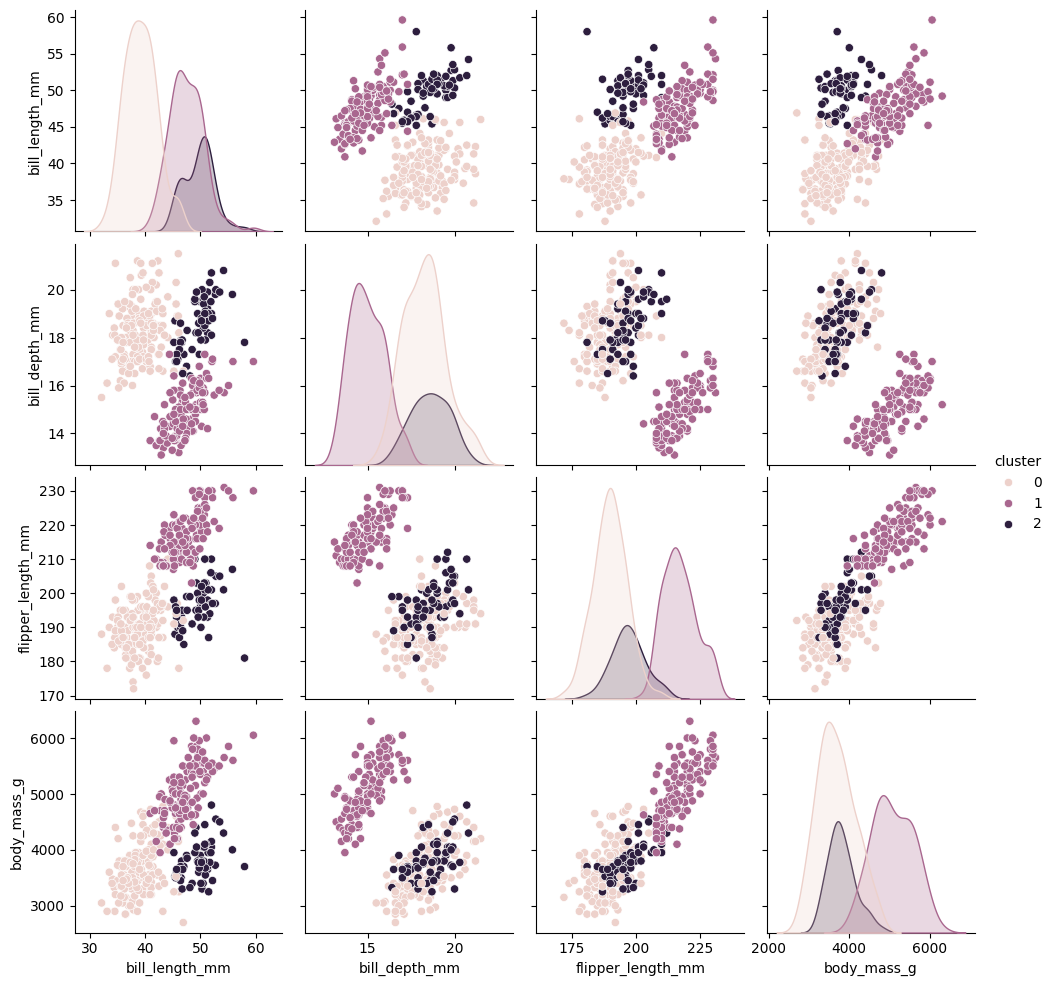

In [28]:
# Plotando a distribuição dos clusters com pairplot
sns.pairplot(df_clean, hue='cluster', vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
plt.show()


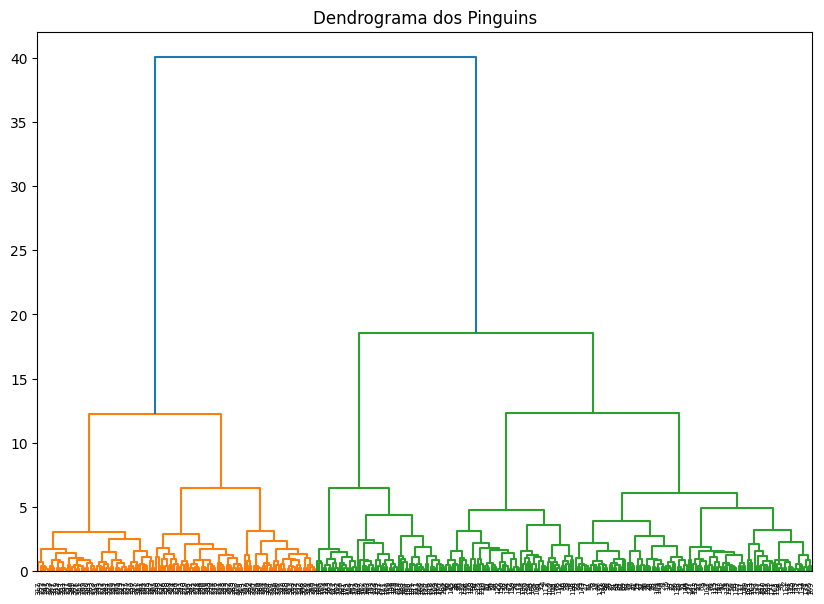

In [29]:
# Construindo o dendrograma
plt.figure(figsize=(10, 7))
plt.title("Dendrograma dos Pinguins")
dendrogram = shc.dendrogram(shc.linkage(quantitative_vars_scaled, method='ward'))
plt.show()

Através do dendograma, observamos que a distribiução dos dados se adequa melhor em dois grandes grupos. Sabemos que temos 3 espécies, e, para que consigamos uma distribuição adequada, precisamos 'cortar' o gráfico no valor 15 no eixo Y.

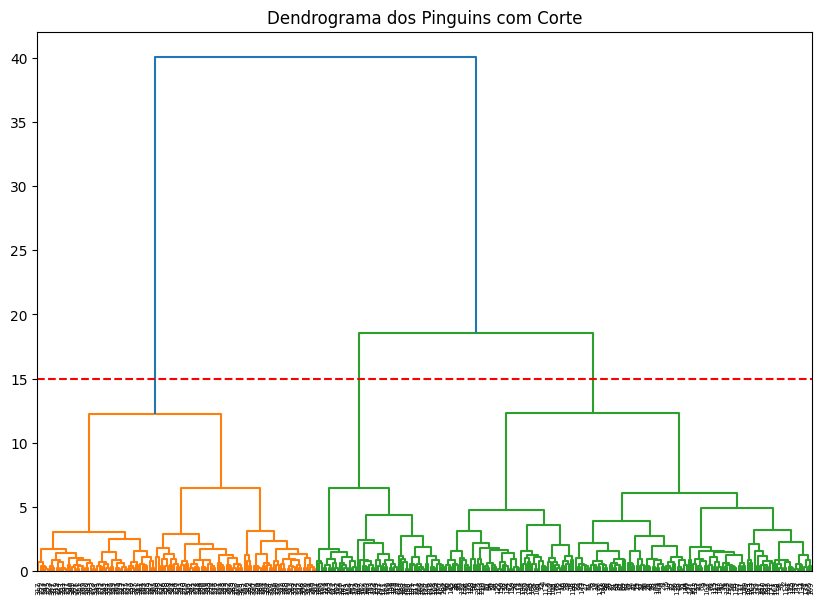

In [30]:
# Construindo o dendrograma com o corte no valor 15 no eixo Y
plt.figure(figsize=(10, 7))
plt.title("Dendrograma dos Pinguins com Corte")
dendrogram = shc.dendrogram(shc.linkage(quantitative_vars_scaled, method='ward'))
plt.axhline(y=15, color='r', linestyle='--')
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [31]:
# Utilizando crosstab para calcular a quantidade de pinguins de cada espécie em cada grupo
species_cluster_crosstab = pd.crosstab(df_clean['species'], df_clean['cluster'])

species_cluster_crosstab

cluster,0,1,2
species,,,
Adelie,151,0,0
Chinstrap,11,0,57
Gentoo,0,123,0


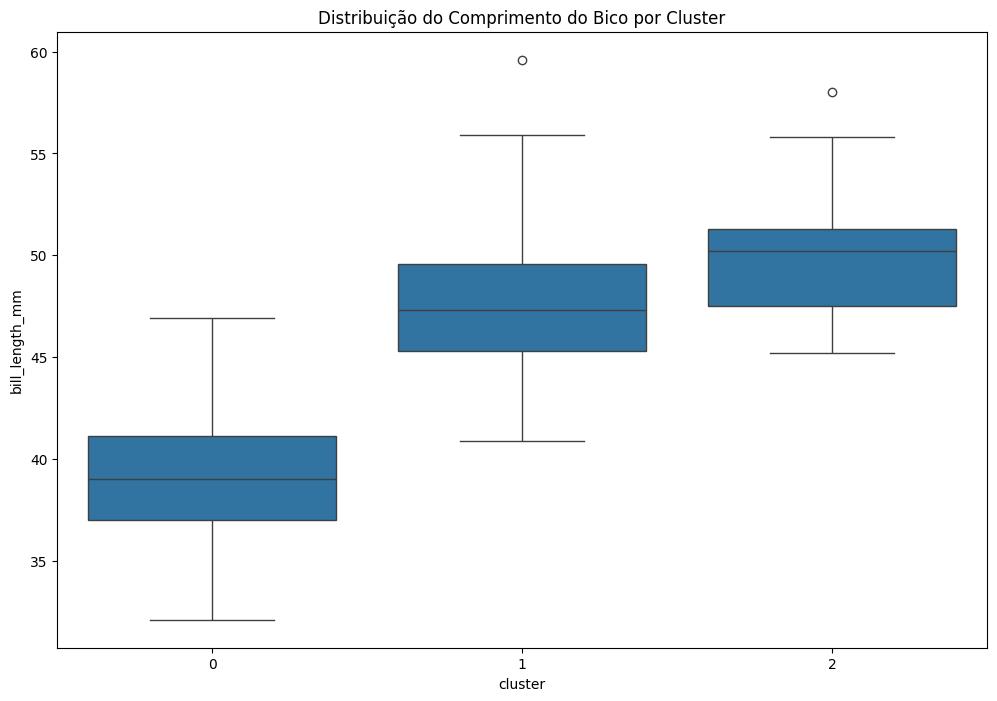

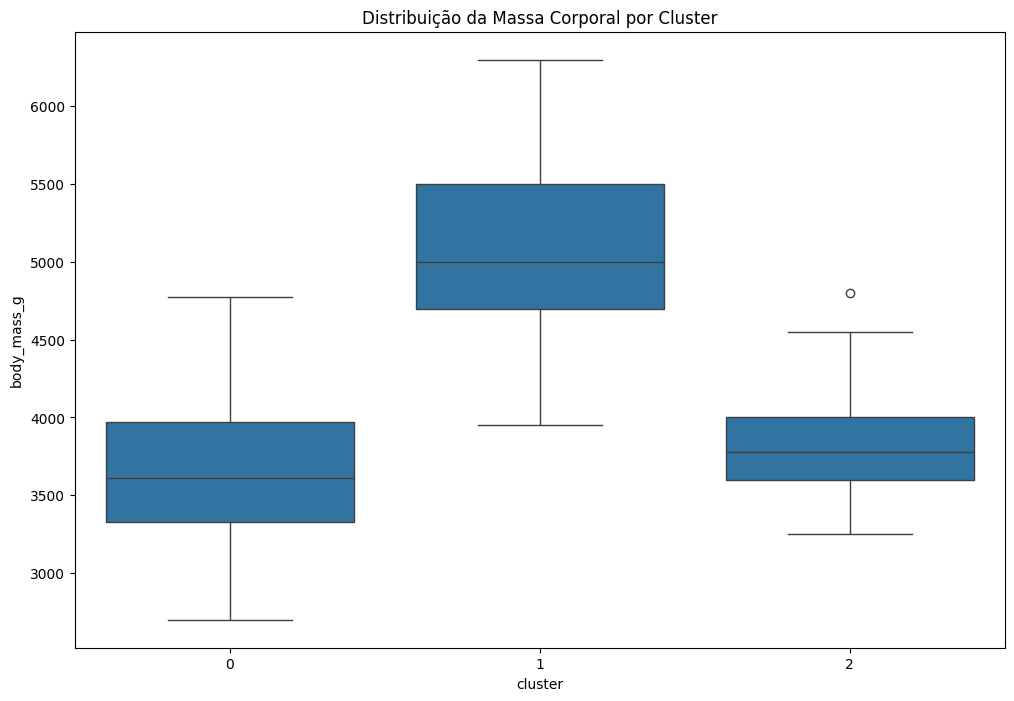

In [32]:

# Visualizando as distribuições das variáveis quantitativas por cluster
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster', y='bill_length_mm', data=df_clean)
plt.title('Distribuição do Comprimento do Bico por Cluster')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster', y='body_mass_g', data=df_clean)
plt.title('Distribuição da Massa Corporal por Cluster')
plt.show()

**Obs:** A escolha de bill_lenght_mm e body_mass em nossos boxplot foi devido a (conforme observado no pairplot anteriormente), serem as duas variáveis mais explicativas para a distribuição dos nossos clusters.

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

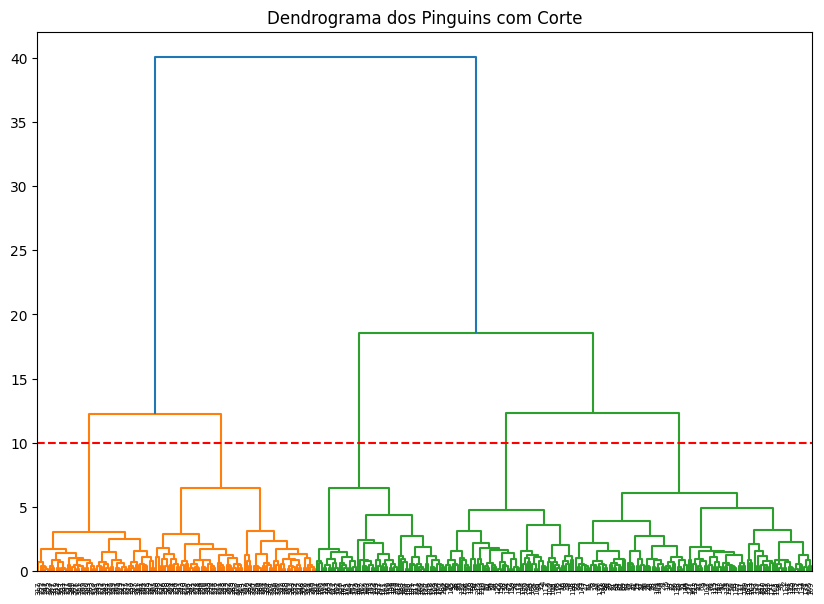

In [35]:
# Construindo o dendrograma com o corte no valor 10 no eixo Y
plt.figure(figsize=(10, 7))
plt.title("Dendrograma dos Pinguins com Corte")
dendrogram = shc.dendrogram(shc.linkage(quantitative_vars_scaled, method='ward'))
plt.axhline(y=10, color='r', linestyle='--')
plt.show()

Com base no dendograma acima, observamos que um corte na altura 10 no eixo y podemos obter 5 grupos ainda bem respresentados.

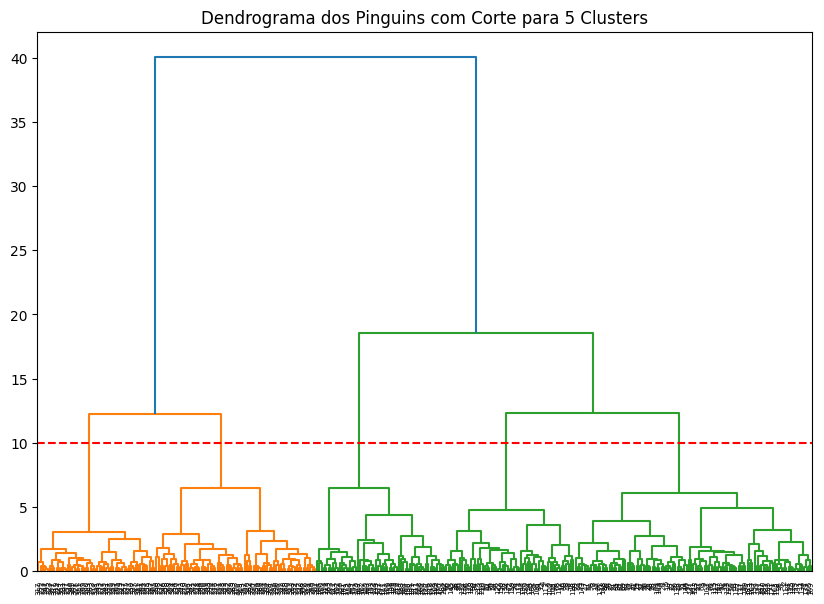

In [44]:
# Criando a matriz de linkage
Z = shc.linkage(quantitative_vars_scaled, method='ward')

# Escolhendo o número de grupos com base na observação do dendrograma
num_clusters = 5 

# Aplicando o corte no dendrograma para formar o número escolhido de grupos
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Adicionando os clusters ao DataFrame original
df_clean = df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']).copy()
df_clean['cluster'] = clusters

# Plotando o dendrograma
plt.figure(figsize=(10, 7))
plt.title("Dendrograma dos Pinguins com Corte para 5 Clusters")
dendrogram = shc.dendrogram(Z)
plt.axhline(y=10, color='r', linestyle='--')
plt.show()

In [46]:
 # Quantos pinguins de cada espécie há em cada grupo?
species_cluster_crosstab = pd.crosstab(df_clean['species'], df_clean['cluster'])
species_cluster_crosstab

cluster,1,2,3,4,5
species,,,,,
Adelie,0,0,0,54,97
Chinstrap,0,0,57,3,8
Gentoo,52,71,0,0,0


In [48]:
# Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
species_sex_cluster_crosstab = pd.crosstab(index=[df_clean['species'], df_clean['sex']], columns=df_clean['cluster'])

species_sex_cluster_crosstab

cluster            1   2   3   4   5
species   sex                       
Adelie    Female   0   0   0   1  72
          Male     0   0   0  52  21
Chinstrap Female   0   0  23   3   8
          Male     0   0  34   0   0
Gentoo    Female  49   9   0   0   0
          Male     0  61   0   0   0

Observações sobre a Distribuição dos Sexos

Cluster 1: Exclusivo para fêmeas da espécie Gentoo.

Cluster 2: Contém predominantemente machos da espécie Gentoo, com algumas fêmeas.

Cluster 3: Principalmente machos e fêmeas da espécie Chinstrap.

Cluster 4: Agrupa machos da espécie Adelie e algumas fêmeas de Adelie e Chinstrap.

Cluster 5: Predominantemente fêmeas da espécie Adelie, com alguns machos de Adelie e algumas fêmeas de Chinstrap.

- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?


Na minha opinião, o agrupamento em 5 clusters capturou alguns padrões naturais dos dados, mas não de forma ideal. A separação por espécies é clara, especialmente para Gentoo e Chinstrap, mas a divisão dos clusters com base no sexo, especialmente dentro da espécie Gentoo, pode ser um indicativo de que o modelo capturou variações nos dados que não correspondem necessariamente a diferenças biológicas significativas entre os grupos. Isso sugere que a clusterização pode ter exagerado as diferenças baseadas em pequenas variações nos dados.

A divisão dos clusters por sexo dentro da mesma espécie, sem uma razão biológica clara, pode ser vista como um resultado menos desejável, sugerindo que o agrupamento não reflete perfeitamente a estrutura natural dos dados. Portanto, pode ser interessante reconsiderar o número de clusters ou explorar outras técnicas de agrupamento para verificar se há uma separação mais intuitiva e biológica dos grupos.